In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import permutation_test_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

In [30]:
data = pd.read_csv("train_BRCpofr.csv")

In [31]:
data.head() 

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [208]:
data.shape

(89392, 12)

In [4]:
import pandas_profiling as pp

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89392.0,44696.500000,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
marital_status,89392.0,0.575488,0.494272,0.0,0.00,1.0,1.00,1.0
vintage,89392.0,4.595669,2.290446,0.0,3.00,5.0,6.00,8.0
claim_amount,89392.0,4351.502416,3262.359775,0.0,2406.00,4089.0,6094.00,31894.0
cltv,89392.0,97952.828978,90613.814793,24828.0,52836.00,66396.0,103440.00,724068.0


In [101]:
data.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [102]:
data["gender"].unique() , data["gender"].value_counts()

(array(['Male', 'Female'], dtype=object),
 Male      50497
 Female    38895
 Name: gender, dtype: int64)

In [103]:
data["area"].unique() , data["area"].value_counts()

(array(['Urban', 'Rural'], dtype=object),
 Urban    62455
 Rural    26937
 Name: area, dtype: int64)

In [104]:
data["income"].unique() , data["income"].value_counts()

(array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object),
 5L-10L           52716
 2L-5L            21158
 More than 10L    13664
 <=2L              1854
 Name: income, dtype: int64)

In [105]:
data["qualification"].unique() ,  data["qualification"].value_counts()

(array(['Bachelor', 'High School', 'Others'], dtype=object),
 High School    46247
 Bachelor       39399
 Others          3746
 Name: qualification, dtype: int64)

In [106]:
data["vintage"].unique() ,  data["vintage"].value_counts()

(array([5, 8, 7, 6, 1, 0, 3, 4, 2], dtype=int64),
 6    17769
 7    13095
 5    12481
 4    10471
 2     9165
 1     7671
 8     7624
 3     7085
 0     4031
 Name: vintage, dtype: int64)

In [107]:
data["num_policies"].unique() , data["num_policies"].value_counts()

(array(['More than 1', '1'], dtype=object),
 More than 1    60263
 1              29129
 Name: num_policies, dtype: int64)

In [108]:
data["policy"].unique() , data["policy"].value_counts()

(array(['A', 'C', 'B'], dtype=object),
 A    56644
 B    24635
 C     8113
 Name: policy, dtype: int64)

In [109]:
data["type_of_policy"].unique() , data["type_of_policy"].value_counts()

(array(['Platinum', 'Gold', 'Silver'], dtype=object),
 Platinum    47796
 Silver      21010
 Gold        20586
 Name: type_of_policy, dtype: int64)

In [110]:
data["marital_status"].unique() , data["marital_status"].value_counts()

(array([1, 0], dtype=int64),
 1    51444
 0    37948
 Name: marital_status, dtype: int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x13eb5063790>,
 'caps': [<matplotlib.lines.Line2D at 0x13eb5063e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13eb5063430>],
 'medians': [<matplotlib.lines.Line2D at 0x13eb507b550>],
 'fliers': [<matplotlib.lines.Line2D at 0x13eb507b8b0>],
 'means': []}

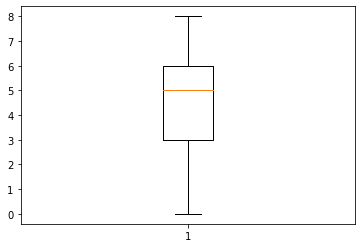

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

plt.boxplot(data.vintage) #no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2cdc0c2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2cdc0c970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2cdbfff10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2cdc19070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2cdc193d0>],
 'means': []}

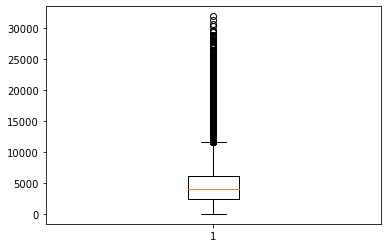

In [26]:
plt.boxplot(data.claim_amount) #outliers detected

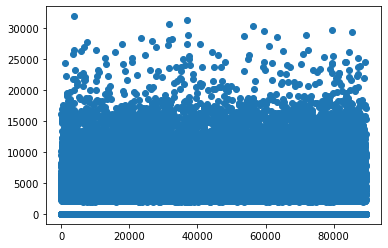

In [27]:
plt.scatter(data.id , data.claim_amount) 

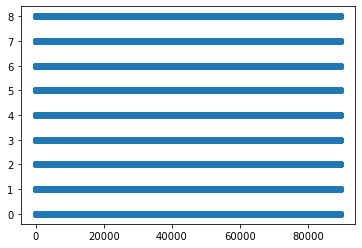

In [28]:
plt.scatter(data.id , data.vintage)

In [29]:
import seaborn as sns

<AxesSubplot:>

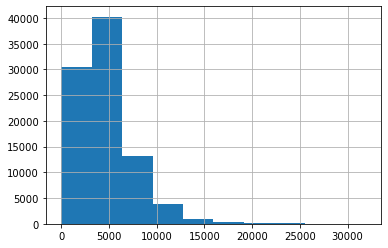

In [30]:
data["claim_amount"].hist() 

<AxesSubplot:>

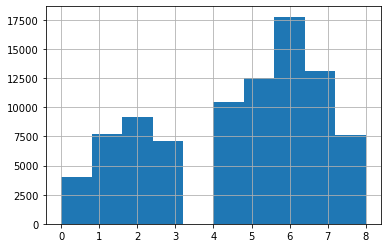

In [31]:
data["vintage"].hist() 

C:\Users\sejal Jadev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sejal Jadev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


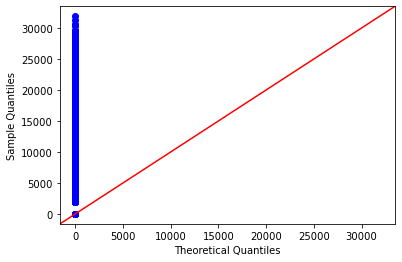

In [7]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
sm.qqplot(data["claim_amount"], line='45')
pylab.show() #not normally distributed at all

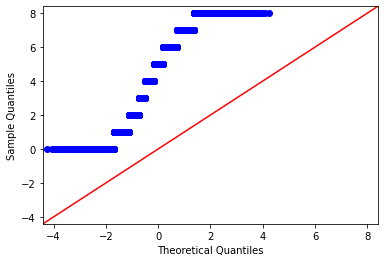

In [8]:
sm.qqplot(data["vintage"], line='45')
pylab.show() # not normally distributed 

In [5]:
Q1=data["claim_amount"].quantile(0.25)
Q3=data["claim_amount"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)


2406.0
6094.0
3688.0


In [6]:
Lower_Whisker = Q1 - (1.5*IQR)
Upper_Whisker = Q3 +( 1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

-3126.0 11626.0


In [6]:
data_no_outliers = data[data["claim_amount"]< Upper_Whisker]


In [7]:
data.shape , data_no_outliers.shape

((89392, 12), (87134, 12))

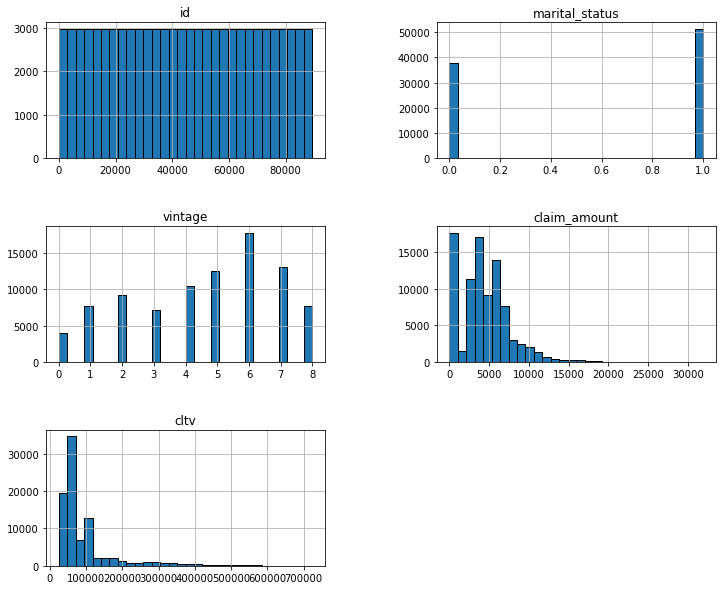

In [202]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

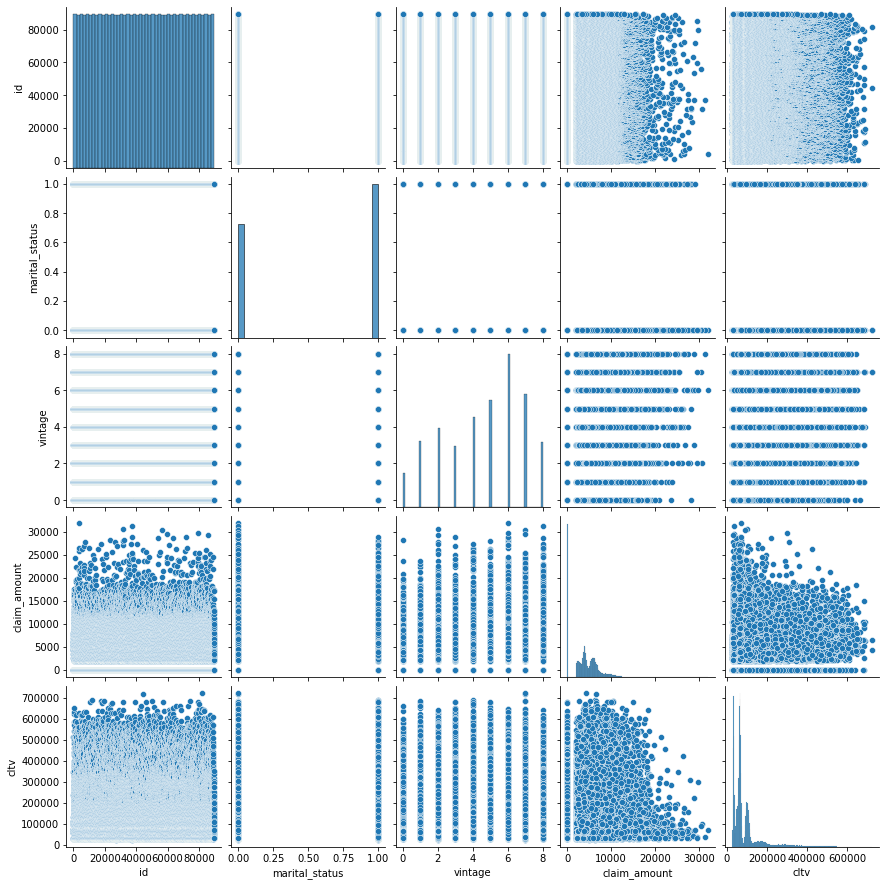

In [205]:
_ = sns.pairplot(data=data, palette='viridis')

In [32]:
data_no_outliers = data[(data['claim_amount'] <Upper_Whisker) & (data['claim_amount'] > Lower_Whisker)]
print("shape of data with outliers" ,data.shape) 
print("shape of data without outliers" ,data_no_outliers.shape)

shape of data with outliers (89392, 12)
shape of data without outliers (89392, 12)


In [33]:
Q1=data_no_outliers["cltv"].quantile(0.25)
Q3=data_no_outliers["cltv"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - (1.5*IQR)
Upper_Whisker = Q3 +( 1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

data_no_outliers = data_no_outliers[(data_no_outliers['cltv'] <Upper_Whisker) & (data_no_outliers['cltv'] > Lower_Whisker)]
print("shape of data without outliers" ,data_no_outliers.shape)

52836.0
103440.0
50604.0
-23070.0 179346.0
shape of data without outliers (79169, 12)


In [34]:
data_no_outliers.columns , data_no_outliers.shape

(Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
        'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
        'cltv'],
       dtype='object'),
 (79169, 12))

C:\Users\sejal Jadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_amount'>

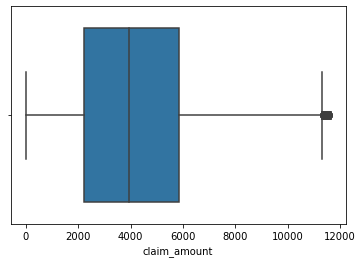

In [20]:
sns.boxplot(data_no_outliers["claim_amount"]) # outliers removed

C:\Users\sejal Jadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cltv'>

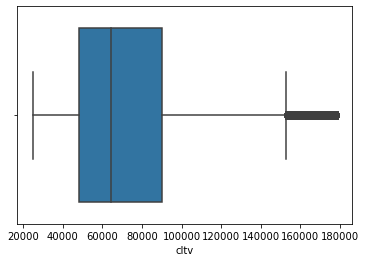

In [21]:
sns.boxplot(data_no_outliers["cltv"]) # outliers removed

In [35]:
data_no_outliers = data_no_outliers[(data_no_outliers["qualification"] == "Bachelor") | (data_no_outliers["qualification"] == 'High School')]
data_no_outliers["income"][data_no_outliers["income"] == '<=2L'] = '2L-5L'

In [36]:
data_no_outliers.qualification.unique() , data_no_outliers["income"].unique()

(array(['Bachelor', 'High School'], dtype=object),
 array(['5L-10L', 'More than 10L', '2L-5L'], dtype=object))

In [12]:
data_no_outliers.shape

(73925, 12)

In [13]:
categorical_data = data_no_outliers.drop([ "id" , "claim_amount" , "vintage" , "cltv"] , axis = 1) 
numerical_data = data_no_outliers[["claim_amount" , "vintage" ]]
y_variable =data_no_outliers["cltv"]

In [26]:
categorical_data.shape , numerical_data.shape

((73925, 8), (73925, 2))

In [27]:
categorical_data.qualification.unique()

array(['Bachelor', 'High School'], dtype=object)

In [28]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73925 entries, 0 to 89391
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   claim_amount  73925 non-null  int64
 1   vintage       73925 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


In [29]:
categorical_data.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'num_policies', 'policy', 'type_of_policy'],
      dtype='object')

In [ ]:
#Data preprocessing 
#https://towardsdatascience.com/data-preprocessing-e2b0bed4c7fb

C:\Users\sejal Jadev\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vintage', ylabel='Density'>

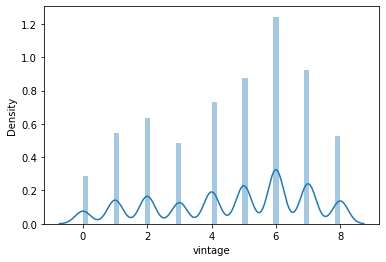

In [30]:
sns.distplot(numerical_data["vintage"])

C:\Users\sejal Jadev\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='claim_amount', ylabel='Density'>

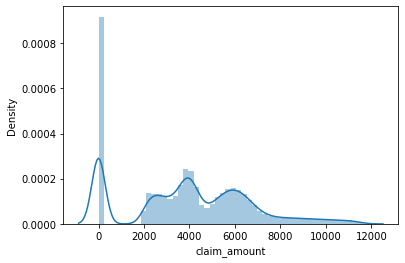

In [31]:
sns.distplot(numerical_data["claim_amount"])

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_data_labelenco = categorical_data.apply(lambda col: le.fit_transform(col))

# print the encoded dataframe
categorical_data_labelenco.head()

,gender,area,qualification,income,marital_status,num_policies,policy,type_of_policy
0,1,1,0,1,1,1,0,1
1,1,0,1,1,0,1,0,1
2,1,1,0,1,1,1,0,1
3,0,0,1,1,0,1,0,1
4,1,1,1,2,1,1,0,0


In [14]:
# compute correlation matrix
corr_matrix = numerical_data.corr()

# print the correlation matrix
print(corr_matrix) 

# the numerical variable are hardly correlated with each other

              claim_amount   vintage
claim_amount      1.000000  0.000192
vintage           0.000192  1.000000


In [15]:
np.corrcoef(numerical_data["claim_amount"] , data_no_outliers["cltv"])

array([[1.        , 0.14885212],
       [0.14885212, 1.        ]])

In [16]:
np.corrcoef(numerical_data["vintage"] , data_no_outliers["cltv"])

array([[1.        , 0.03980697],
       [0.03980697, 1.        ]])

In [35]:
data_no_outliers.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [37]:
data_no_outliers["marital_status"][data_no_outliers["marital_status"] == 1] = "yes"
data_no_outliers["marital_status"][data_no_outliers["marital_status"] == 0] = "no"

In [ ]:
data_new = data_no_outliers.drop["id" , axis = 1]
y_new = data_no_outliers["cltv"]

In [46]:
data_new = pd.get_dummies(data = data_new , columns= ["gender" , "area", "qualification" , "income" , "marital_status" ,
                                                      "vintage" , "num_policies" , "policy" , "type_of_policy"])

In [65]:
scaler = MinMaxScaler()

In [56]:
claim_amt = scaler.fit_transform(np.array(data_new["claim_amount"]).reshape(-1 , 1))

In [57]:
data_new["claim_amount"] = claim_amt

In [58]:
data_new.head()

,claim_amount,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,income_2L-5L,income_5L-10L,income_More than 10L,...,vintage_7,vintage_8,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,0.181539,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,0.081489,0,1,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0
3,0.000000,1,0,1,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
4,0.109989,0,1,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
7,0.171600,1,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [63]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(data_new , y_new , random_state = 0 , test_size = 0.3)

In [74]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
def train_regressor(estimator, X_train, y_train, cv, name):
    cv_results = cross_validate(estimator,
                                X_train,
                                y_train,
                                cv=cv,
                                scoring='neg_mean_absolute_error',
                                return_train_score=True,
                                return_estimator=True)

    cv_train_error = -1 * cv_results['train_score']
    cv_test_error = -1 * cv_results['test_score']

    print(f'On an average, {name} makes an error of ',
          f'{cv_train_error.mean():.3f} (+/-) {cv_train_error.std():.3f} on the training set.')

    print(f'On an average, {name} makes an error of ',
          f'{cv_test_error.mean():.3f} (+/-) {cv_test_error.std():.3f} on the testing set.')

In [75]:
train_regressor(AdaBoostRegressor(), x_train, y_train, cv, 'AdaBoostRegressor')


On an average, AdaBoostRegressor makes an error of  23081.408 (+/-) 68.406 on the training set.
On an average, AdaBoostRegressor makes an error of  23149.357 (+/-) 115.407 on the testing set.


In [69]:
train_regressor(GradientBoostingRegressor(), x_train,
y_train, cv, 'GradientBoostingRegressor')

On an average, GradientBoostingRegressor makes an error of  20676.938 (+/-) 17.241 on the training set.
On an average, GradientBoostingRegressor makes an error of  20842.648 (+/-) 72.521 on the testing set.


In [71]:
train_regressor(XGBRegressor(), x_train,
                y_train, cv, 'XGBoostRegressor')

On an average, XGBoostRegressor makes an error of  18982.459 (+/-) 79.016 on the training set.
On an average, XGBoostRegressor makes an error of  20992.100 (+/-) 90.766 on the testing set.


In [101]:
xgbreg = XGBRegressor()

In [102]:
xgbreg.fit(x_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', ...)

In [103]:
pred = xgbreg.predict(x_test)

In [104]:
r2_score(pred , y_test)

-1.1521099358779567

In [105]:
from catboost import CatBoostRegressor

In [106]:
catreg = CatBoostRegressor()

In [107]:
catreg.fit(x_train , y_train)

Learning rate set to 0.076662
0:	learn: 31124.8537951	total: 150ms	remaining: 2m 29s
1:	learn: 30503.4384180	total: 154ms	remaining: 1m 16s
2:	learn: 29962.8658435	total: 159ms	remaining: 52.8s
3:	learn: 29490.7228932	total: 164ms	remaining: 40.9s
4:	learn: 29079.7703303	total: 170ms	remaining: 33.8s
5:	learn: 28727.6101972	total: 175ms	remaining: 29s
6:	learn: 28427.4255812	total: 181ms	remaining: 25.7s
7:	learn: 28159.5482630	total: 187ms	remaining: 23.2s
8:	learn: 27935.4276453	total: 192ms	remaining: 21.2s
9:	learn: 27743.9127458	total: 197ms	remaining: 19.5s
10:	learn: 27577.0624464	total: 200ms	remaining: 18s
11:	learn: 27426.7246655	total: 205ms	remaining: 16.9s
12:	learn: 27295.4689999	total: 220ms	remaining: 16.7s
13:	learn: 27182.8689192	total: 227ms	remaining: 16s
14:	learn: 27086.4692161	total: 232ms	remaining: 15.2s
15:	learn: 27006.8038060	total: 237ms	remaining: 14.6s
16:	learn: 26939.3722464	total: 242ms	remaining: 14s
17:	learn: 26878.3936455	total: 247ms	remaining: 13

In [110]:
pred = catreg.predict(x_test)

In [111]:
r2_score(pred , y_test)

-1.1774212303703573